In [1]:
import os
import pandas as pd

from preprocessing import PreProcessing

In [2]:
bike_sharing_path = "/Users/Alessia/Desktop/Bike_Sharing/Bike-Sharing-Dataset/"
csv_hourly = "hour.csv"
csv_daily = "day.csv"

In [28]:
data_hourly = PreProcessing.load_data(bike_sharing_path, csv_hourly)
data_daily = PreProcessing.load_data(bike_sharing_path, csv_daily)

# dteday: date
# season: season (1:winter, 2:spring, 3:summer, 4:fall)
# yr: year (0: 2011, 1:2012)
# mnth: month (1 to 12)
# hr: hour (0 to 23)
# holiday: (0:no, 1:yes)
# weekday: day of the week 
# workingday: (0:no, 1:yes)
# weathersit:  
    #- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    #- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    #- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    #- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# hum: Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)
# casual: count of casual users
# registered: count of registered users
# cnt: count of total rental bikes including both casual and registered

# Show firts rows
data_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Data information
data_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Get number of rows and columns
data_hourly.shape

(17379, 17)

In [7]:
# Distribution of cnt (count rate)
import matplotlib.pyplot as plt

data_hourly.hist(column='cnt', bins=100)
plt.grid(False)
plt.show()

<Figure size 640x480 with 1 Axes>

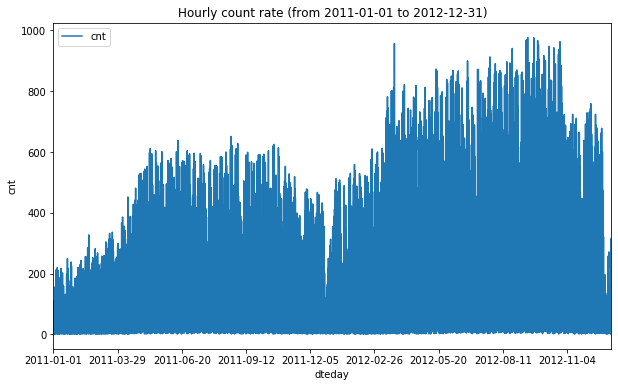

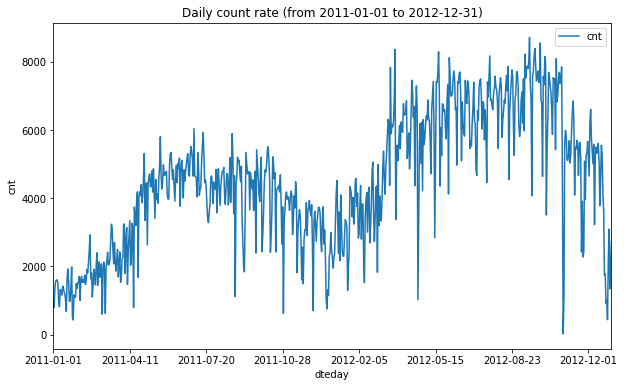

In [8]:
# Hourly and daily count rate

data_hourly.plot(x='dteday', y='cnt', figsize=(10,6))
plt.ylabel('cnt')
plt.title("Hourly count rate (from 2011-01-01 to 2012-12-31)")
plt.show()


data_daily.plot(x='dteday', y='cnt', figsize=(10,6))
plt.ylabel('cnt')
plt.title("Daily count rate (from 2011-01-01 to 2012-12-31)")
plt.show()


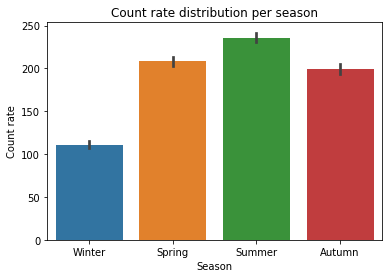

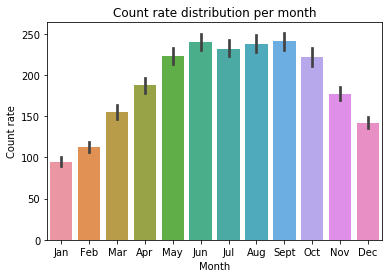

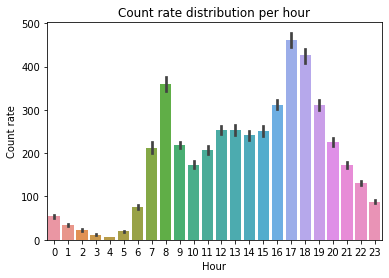

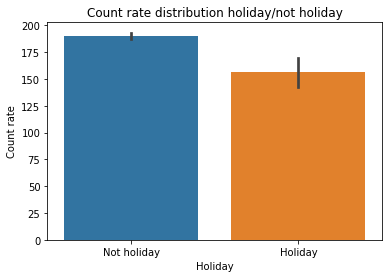

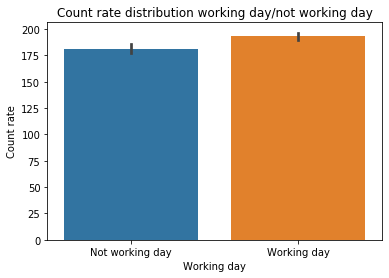

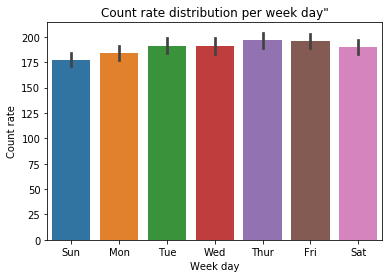

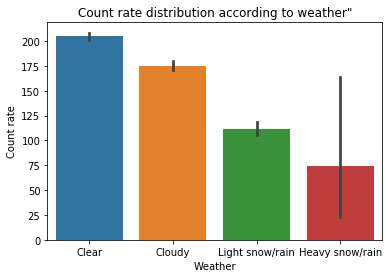

In [29]:
# Count rate distributions according to different categorical variables
# Seaborn barplot already shows the estimate
import seaborn as sns

def barplot_cat(df, col1, col2, xlabel, ylabel, ticklabels, title): 
    """
    Barplot for categorical variables.
    
    Parameters:
    ===========
    df: pandas.DataFrame 
    col1: x axis variable.
    col2: y axis variable.
    xlabel: x axis label. 
    ylabel: y axis label.
    ticklabels: list with x axis tick-mark labels.
    title: plot title.
    """  
    
    ax = sns.barplot(data=df[[col1, col2]], x=col1, y=col2)
    if ticklabels:
        ax.set_xticklabels(ticklabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    return ax

season = ['Winter', 'Spring', 'Summer', 'Autumn']
season_plot = barplot_cat(data_hourly,
                         'season',
                         'cnt',
                         'Season',
                         'Count rate', 
                         season, 
                         'Count rate distribution per season')
plt.show()

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
mont_plot = barplot_cat(data_hourly,
                        'mnth',
                        'cnt',
                        'Month',
                        'Count rate', 
                         month, 
                        'Count rate distribution per month')
plt.show()

hour_plot = barplot_cat(data_hourly,
                        'hr',
                        'cnt',
                        'Hour',
                        'Count rate', 
                         None, 
                        'Count rate distribution per hour')
plt.show()

holiday = ['Not holiday', 'Holiday']
holiday_plot = barplot_cat(data_hourly,
                        'holiday',
                        'cnt',
                        'Holiday',
                        'Count rate', 
                         holiday, 
                        'Count rate distribution holiday/not holiday')
plt.show()

workingday = ['Not working day', 'Working day']
workingday_plot = barplot_cat(data_hourly,
                        'workingday',
                        'cnt',
                        'Working day',
                        'Count rate', 
                         workingday,
                        'Count rate distribution working day/not working day')
plt.show()

weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
weekday_plot = barplot_cat(data_hourly,
                        'weekday',
                        'cnt',
                        'Week day',
                        'Count rate', 
                         weekday, 
                        'Count rate distribution per week day"')
plt.show()

weather = ['Clear', 'Cloudy', 'Light snow/rain', 'Heavy snow/rain']
weather_plot = barplot_cat(data_hourly,
                        'weathersit',
                        'cnt',
                        'Weather',
                        'Count rate', 
                         weather, 
                        'Count rate distribution according to weather"')
plt.show()




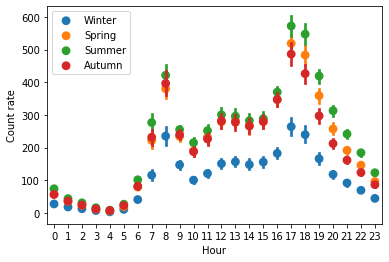

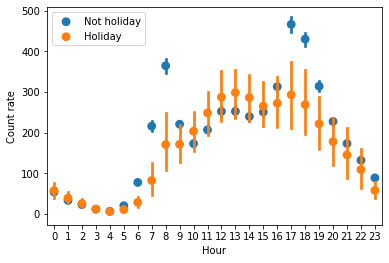

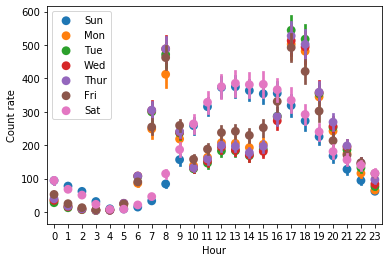

In [30]:
# Other count rate distributions according to categorical variables
# Seaborn point plot shows the estimate

def pointplot_cat(df, col1, col2, hue, xlabel, ylabel, leglabels, title):
    """
    Pointplot for categorical variables.
    
    Parameters:
    ===========
    df: pandas.DataFrame 
    col1: x axis variable.
    col2: y axis variable.
    hue: hue variable.
    xlabel: x axis label. 
    ylabel: y axis label.
    leglabels: list with hue variable labels.
    title: plot title.
    """ 
    ax = sns.pointplot(data=df[[col1,col2,hue]], x=col1, y=col2, hue=hue, linestyles='')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    leg_handles = ax.get_legend_handles_labels()[0]
    ax.legend(leg_handles, leglabels)
    
    return ax

# Hourly count rate distribution per season


hourly_season_plot = pointplot_cat(data_hourly,
                                  'hr',
                                  'cnt',
                                  'season',
                                  'Hour',
                                  'Count rate',
                                  season,
                                  'Hourly count rate distribution')
plt.show()

hourly_holiday_plot = pointplot_cat(data_hourly,
                                  'hr',
                                  'cnt',
                                  'holiday',
                                  'Hour',
                                  'Count rate',
                                  holiday,
                                  'Hourly count rate distribution')
plt.show()

hourly_weekday_plot = pointplot_cat(data_hourly,
                                  'hr',
                                  'cnt',
                                  'weekday',
                                  'Hour',
                                  'Count rate',
                                  weekday,
                                  'Hourly count rate distribution')
plt.show()



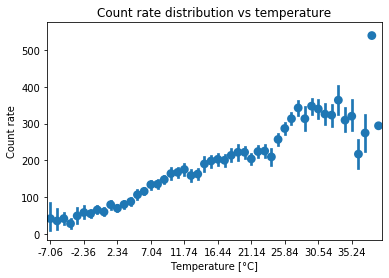

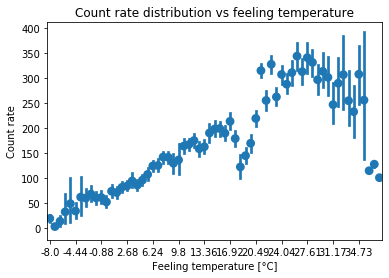

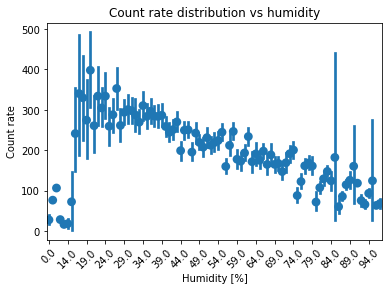

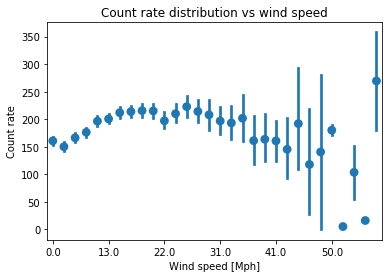

In [11]:
# Count rate distributions according to continuos variables
import numpy as np

def continuos_variable_plot(df, col1, col2, xlabel, ylabel, title):
    """
    Point plot for continuos variables.
    
    Parameters:
    ===========
    df: pandas.DataFrame 
    col1: x axis variable.
    col2: y axis variable.
    xlabel: x axis label. 
    ylabel: y axis label. 
    title: plot title.
    """
    
    ax = sns.pointplot(data=df[[col1, col2]], x=col1, y=col2, linestyles='')
    
    tick_pos = []
    tick_label = []
    
    for idx, label in enumerate(ax.get_xticklabels()):
        if idx%5 == 0:
            tick_pos.append(idx)
            tick_label.append(label)
            
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(tick_pos)
    if col1=='humidity':
        ax.set_xticklabels(tick_label, rotation=45)
    else:
        ax.set_xticklabels(tick_label)
      
    return ax
  
# Continuos variables are normalized. Original values are calculated in order to make the plots.

# Count rate vs temperature

#t_norm = (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
#t = t_norm*(t_max-t_min)+t_min 

t_min=-8
t_max=+39

data_hourly['temperature'] = np.round(data_hourly['temp'].apply(lambda t: t*(t_max-t_min)+t_min), decimals=2)

temperature_plot = continuos_variable_plot(data_hourly, 
                                           'temperature', 
                                           'cnt', 
                                           'Temperature [°C]', 
                                           'Count rate', 
                                           'Count rate distribution vs temperature')
plt.show()


# Count rate vs feeling temperature

data_hourly['atemperature'] = np.round(data_hourly['atemp'].apply(lambda t: t*(t_max-t_min)+t_min), decimals=2)

atemperature_plot = continuos_variable_plot(data_hourly, 
                                            'atemperature', 
                                            'cnt', 
                                            'Feeling temperature [°C]', 
                                            'Count rate', 
                                            'Count rate distribution vs feeling temperature')
plt.show()

# Count rate vs humidity

#hum divided by hum_max = 100

data_hourly['humidity'] = np.round(data_hourly['hum'].apply(lambda h: h*100), decimals=2)
                                   
                              
humidity_plot = continuos_variable_plot(data_hourly, 
                                        'humidity',
                                        'cnt', 
                                        'Humidity [%]', 
                                        'Count rate', 
                                        'Count rate distribution vs humidity')


plt.show()

                                   
# Count rate vs windspeed

#windspeed divided by windspeed_max=67
                                   
data_hourly['wind_speed'] = np.round(data_hourly['windspeed'].apply(lambda w: w*67), decimals=2)
                                     
                                     
windspeed_plot = continuos_variable_plot(data_hourly, 
                                        'wind_speed',
                                        'cnt', 
                                        'Wind speed [Mph]', 
                                        'Count rate', 
                                        'Count rate distribution vs wind speed')
plt.show()
                                   
   
